# Importing Necessary Modules

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from logistic_regression import LogisticRegressor
from sklearn.metrics import accuracy_score
from joblib import dump, load

# Data Preperation (Training and Test datasets)

In [2]:
# Reading in the .h5 files containing the data
train_file = h5py.File('data/train.h5', 'r')
test_file = h5py.File('data/test.h5', 'r')

In [3]:
# printing the keys in the dictionaries extracted from the .h5 files
print(list(train_file.keys()))
print(list(test_file.keys()))

['list_classes', 'train_set_x', 'train_set_y']
['list_classes', 'test_set_x', 'test_set_y']


In [4]:
# CREATING NUMPY ARRAYS CONTAINING THE VALUES FROM THE DICTIONARIES
# Training set
X_train_orig = np.array([image for image in train_file['train_set_x']])
y_train = np.array([class_ for class_ in train_file['train_set_y']]) 
# Testing set
X_test_orig = np.array(test_file['test_set_x'])
y_test = np.array(test_file['test_set_y']).reshape((50, 1))

In [5]:
X_train_orig.shape, y_train.shape

((209, 64, 64, 3), (209,))

In [6]:
X_test_orig.shape, y_test.shape

((50, 64, 64, 3), (50, 1))

This is an example image from the training set

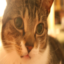

In [7]:
Image.fromarray(X_train_orig[200], 'RGB')

There are 209 training examples (rows) , each of them 64x64 images with 3 color channels.

## Shaping the data

We need the data to be of the shape (12288, 209) i.e. each image array should be flattened (converted into single dimension array) and they should be stacked as columns.

In [8]:
# FLATTENING EACH OF THE IMAGE ARRAYS
# training set
X_train = X_train_orig.reshape((X_train_orig.shape[1]*X_train_orig.shape[2]*3, X_train_orig.shape[0]))
y_train = y_train.reshape((209, 1))
# test set
X_test = X_test_orig.reshape((X_test_orig.shape[1]*X_test_orig.shape[2]*X_test_orig.shape[3], X_test_orig.shape[0]))

In [9]:
X_train.shape, X_test.shape

((12288, 209), (12288, 50))

In [10]:
y_train.shape, y_test.shape

((209, 1), (50, 1))

# Logistic Regression With a Neural Network Mindset

We have to normalize the training set and test set for the model to be able to learn better. For that, the arrays are divided by 255 which is the maximum color value that a pixel can get.

In [11]:
X_train = X_train / 255
X_test = X_test / 255

# Creating and Training the model

In [12]:
model = LogisticRegressor(X_train, y_train, 0.005, 2000)

Cost Function at iteration 0 = 49.90991349400296
Cost Function at iteration 100 = 40.68314226870631
Cost Function at iteration 200 = 44.91905448570984
Cost Function at iteration 300 = 49.01556734117475
Cost Function at iteration 400 = 52.81654773762791
Cost Function at iteration 500 = 56.35008001800301
Cost Function at iteration 600 = 59.76948212885117
Cost Function at iteration 700 = 63.23556142542176
Cost Function at iteration 800 = 66.89445964931879
Cost Function at iteration 900 = 70.89905285604577
Cost Function at iteration 1000 = 75.45178604874175
Cost Function at iteration 1100 = 80.87801147646859
Cost Function at iteration 1200 = 87.70279349325467
Cost Function at iteration 1300 = 95.90248243062499
Cost Function at iteration 1400 = 101.49930848717197
Cost Function at iteration 1500 = 103.08139510601559
Cost Function at iteration 1600 = 104.0019370512395
Cost Function at iteration 1700 = 104.91087581190061
Cost Function at iteration 1800 = 105.81708603631886
Cost Function at ite

# Testing the model

In [13]:
model.predict_proba(X_train)[:5]

array([0.1285541 , 0.0828577 , 0.51390991, 0.08177344, 0.10221405])

In [14]:
train_preds = model.predict(X_train)
print("Prediction    Actual Value")
for pred_value, actual_value in zip(train_preds[:30], y_train[:30]):
    print(pred_value, "                 ", actual_value[0])

Prediction    Actual Value
0                   0
0                   0
1                   1
0                   0
0                   0
0                   0
0                   0
0                   1
1                   0
0                   0
0                   0
1                   1
0                   0
1                   1
1                   1
0                   0
0                   0
0                   0
0                   0
0                   1
0                   0
0                   0
0                   0
0                   0
1                   1
1                   1
0                   0
1                   1
0                   0
0                   1


In [15]:
print(f"Accuracy on training set: {model.accuracy(y_train, train_preds)*100:.2f}%")

Accuracy on training set: 91.39%


In [16]:
model.predict_proba(X_test)[:5]

array([0.29525734, 0.26658459, 0.24319337, 0.3172707 , 0.30845875])

In [17]:
test_preds = model.predict(X_test)
print("Prediction    Actual Value")
for pred_value, actual_value in zip(test_preds[:30], y_test[:30]):
    print(pred_value, "                 ", actual_value[0])

Prediction    Actual Value
0                   1
0                   1
0                   1
0                   1
0                   1
0                   0
0                   1
0                   1
0                   1
0                   1
0                   1
0                   1
0                   1
0                   0
0                   0
0                   1
0                   0
0                   1
0                   1
0                   1
0                   1
0                   0
0                   0
0                   1
0                   1
0                   1
0                   1
0                   0
0                   1
0                   0


In [18]:
print(f"Accuracy on test set: {model.accuracy(y_test, test_preds)*100:.2f}%")

Accuracy on test set: 34.00%


# Saving the model

In [19]:
dump(value=model, filename='logistic-regressor.joblib')

['logistic-regressor.joblib']

In [20]:
saved_model = load('logistic-regressor.joblib')
saved_model.accuracy(test_preds, y_test)

0.34